In [149]:
# note to self: use virtual environment venv2

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()

In [2]:
# NOTE: The following code scrapes the website IMDb for a combined 400 various movie reviews, categorizes them
# by rating (positive / mixed / negative) and combines the reviews and their respective labels into a dataframe,
# The code is included solely for demonstrative purposes as rerunning the code would result in an updated list of
# reviews for each title, causing the labelling to no longer match. Instead, the user should simply download the
# precompiled txt file of movie reviews and import it as instructed below to match the results of the notebook

In [2]:
# DO NOT RERUN !!!!
res1 = requests.get('https://www.imdb.com/title/tt10954984/reviews?ref_=tt_urv')
res2 = requests.get('https://www.imdb.com/title/tt10648342/reviews?ref_=tt_urv')
res3 = requests.get('https://www.imdb.com/title/tt11866324/reviews?ref_=tt_urv')
res4 = requests.get('https://www.imdb.com/title/tt9411972/reviews?ref_=tt_urv')
res5 = requests.get('https://www.imdb.com/title/tt10298810/reviews?ref_=tt_urv')
res6 = requests.get('https://www.imdb.com/title/tt1877830/reviews?ref_=tt_urv')
res7 = requests.get('https://www.imdb.com/title/tt1464335/reviews?ref_=tt_urv')
res8 = requests.get('https://www.imdb.com/title/tt11138512/reviews?ref_=tt_urv')
res9 = requests.get('https://www.imdb.com/title/tt6710474/reviews?ref_=tt_urv')
res10 = requests.get('https://www.imdb.com/title/tt15325794/reviews?ref_=tt_urv')
res11 = requests.get('https://www.imdb.com/title/tt8041270/reviews?ref_=tt_urv')
res12 = requests.get('https://www.imdb.com/title/tt12593682/reviews?ref_=tt_urv')
res13 = requests.get('https://www.imdb.com/title/tt7657566/reviews?ref_=tt_urv')
res14 = requests.get('https://www.imdb.com/title/tt12262116/reviews?ref_=tt_urv')
res15 = requests.get('https://www.imdb.com/title/tt4614584/reviews?ref_=tt_urv')
res16 = requests.get('https://www.imdb.com/title/tt3704428/reviews?ref_=tt_urv')

In [3]:
# DO NOT RERUN !!!!
soup1 = bs4.BeautifulSoup(res1.text)
soup2 = bs4.BeautifulSoup(res2.text)
soup3 = bs4.BeautifulSoup(res3.text)
soup4 = bs4.BeautifulSoup(res4.text)
soup5 = bs4.BeautifulSoup(res5.text)
soup6 = bs4.BeautifulSoup(res6.text)
soup7 = bs4.BeautifulSoup(res7.text)
soup8 = bs4.BeautifulSoup(res8.text)
soup9 = bs4.BeautifulSoup(res9.text)
soup10 = bs4.BeautifulSoup(res10.text)
soup11 = bs4.BeautifulSoup(res11.text)
soup12 = bs4.BeautifulSoup(res12.text)
soup13 = bs4.BeautifulSoup(res13.text)
soup14 = bs4.BeautifulSoup(res14.text)
soup15 = bs4.BeautifulSoup(res15.text)
soup16 = bs4.BeautifulSoup(res16.text)

In [4]:
# DO NOT RERUN !!!!
movie_reviews1 = soup1.find_all("div", {"class": "text show-more__control"})
movie_reviews2 = soup2.find_all("div", {"class": "text show-more__control"})
movie_reviews3 = soup3.find_all("div", {"class": "text show-more__control"})
movie_reviews4 = soup4.find_all("div", {"class": "text show-more__control"})
movie_reviews5 = soup5.find_all("div", {"class": "text show-more__control"})
movie_reviews6 = soup6.find_all("div", {"class": "text show-more__control"})
movie_reviews7 = soup7.find_all("div", {"class": "text show-more__control"})
movie_reviews8 = soup8.find_all("div", {"class": "text show-more__control"})
movie_reviews9 = soup9.find_all("div", {"class": "text show-more__control"})
movie_reviews10 = soup10.find_all("div", {"class": "text show-more__control"})
movie_reviews11 = soup11.find_all("div", {"class": "text show-more__control"})
movie_reviews12 = soup12.find_all("div", {"class": "text show-more__control"})
movie_reviews13 = soup13.find_all("div", {"class": "text show-more__control"})
movie_reviews14 = soup14.find_all("div", {"class": "text show-more__control"})
movie_reviews15 = soup15.find_all("div", {"class": "text show-more__control"})
movie_reviews16 = soup16.find_all("div", {"class": "text show-more__control"})

In [5]:
# DO NOT RERUN !!!!
def review_cleaner(movie_reviews):
    movie_reviews_dummy = movie_reviews.copy()
    for review in movie_reviews_dummy:
        i = movie_reviews.index(review)
        movie_reviews[i] = str(review).replace('<div class="text show-more__control">', '')
        movie_reviews[i] = movie_reviews[i].replace('<br/>', '')
        movie_reviews[i] = movie_reviews[i].replace('</div>', '')
    return movie_reviews

movie_reviews1 = review_cleaner(movie_reviews1)
movie_reviews2 = review_cleaner(movie_reviews2)
movie_reviews3 = review_cleaner(movie_reviews3)
movie_reviews4 = review_cleaner(movie_reviews4)
movie_reviews5 = review_cleaner(movie_reviews5)
movie_reviews6 = review_cleaner(movie_reviews6)
movie_reviews7 = review_cleaner(movie_reviews7)
movie_reviews8 = review_cleaner(movie_reviews8)
movie_reviews9 = review_cleaner(movie_reviews9)
movie_reviews10 = review_cleaner(movie_reviews10)
movie_reviews11 = review_cleaner(movie_reviews11)
movie_reviews12 = review_cleaner(movie_reviews12)
movie_reviews13 = review_cleaner(movie_reviews13)
movie_reviews14 = review_cleaner(movie_reviews14)
movie_reviews15 = review_cleaner(movie_reviews15)
movie_reviews16 = review_cleaner(movie_reviews16)

In [6]:
# DO NOT RERUN
movie_reviews = movie_reviews1 + movie_reviews2 + movie_reviews3 + movie_reviews4 + movie_reviews5 + movie_reviews6 + movie_reviews7 + movie_reviews8 + movie_reviews9 + movie_reviews10 + movie_reviews11 + movie_reviews12 + movie_reviews13 + movie_reviews14 + movie_reviews15 + movie_reviews16

In [7]:
# DO NOT RERUN
def string_breaker(movie_reviews):
    for review in movie_reviews.copy():
        i = movie_reviews.index(review)
        movie_reviews.insert(i, '46e57#$sw%%62$45@')
    return movie_reviews


movie_reviews = string_breaker(movie_reviews)

In [8]:
# DO NOT RERUN
with open('movie_reviews.txt', 'a+', encoding="utf-8") as my_list_file:
    for element in movie_reviews:
        my_list_file.write('%s\n' % element)

In [150]:
# Start from this line, in the attached txt file 
my_file = open('movie_reviews.txt', encoding="utf-8")

In [151]:
movie_reviews2 = my_file.read()

In [152]:
movie_reviews2 = movie_reviews2.split('46e57#$sw%%62$45@')

In [153]:
my_file.close()

In [154]:
movie_reviews2.pop(0)

''

In [155]:
movie_reviews2[0]

'\n6.7/10While "Nope" is a visual spectacle I found that it didn\'t sit as well as I would\'ve hoped when it came to the story. However, it still manages to reach its goal of entertaining on some level.The film felt slightly long due to the first and third acts feeling fast and somewhat stuffed with a lot of goings ons while the second act felt very slow and drawn out. The long parts put me into a state of boredom, and even further than that, once the reveal of the antagonist happened, the magic and tension disappeared. Before that tension disappeared I found there was some good tension built up due to the soundtrack, but again, things fell short.As for the horror parts, I assumed there would be more than just the ones shown in the commercial, and while there was, again a lot of the horror/magic disappeared once the antagonist was shown.I did find the acting to be very engaging. Daniel Kaluuya and Keke Palmer each brought great energy to their roles, and the supporting actors were equa

In [156]:
review_df = pd.DataFrame(movie_reviews2, columns = ['review'])

In [157]:
print(review_df['review'].loc[4])


The way most critics are raving about "Nope" makes me wonder if I've been the victim of an elaborate prank where I was shown a different film than what they have been watching.Because "Nope" is, at best, adequate -- a watchable sci-fi action picture that, if it weren't for the fact that it's directed by an Oscar-winning red-hot director and has a budget of roughly $60 mil and stars an Oscar-winning actor, would not be out of place among the myriad of B-movies that litter the virtual shelves of Netflix or Prime Video.First, the good stuff: the film looks gorgeous. Lots of beautiful shots of cloudy skies and spectacular night and day vistas. It was shot on Imax cameras by a master (Hoyte Van Hoytema, Christopher Nolan's regular cinematographer), and it shows. And the dark, foreboding imagery helps Jordan Peele build some effective tension during the first half of the film, when the audience (and the film's characters) still don't know exactly what's going on and what exactly is threaten

In [158]:
label = ['mixed', 'mixed', 'mixed', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 
        'neg', 'pos', 'pos', 'pos', 'mixed', 'neg', 'neg', 'pos', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg',
        'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg', 'mixed', 'neg',
        'neg', 'neg', 'neg', 'mixed', 'neg', 'pos', 'neg', 'pos', 'mixed', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg',
        'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'mixed', 'neg', 'pos', 'neg',
        'pos', 'pos', 'pos', 'mixed', 'pos', 'pos', 'pos', 'mixed', 'mixed', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos',
        'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'mixed', 'neg', 'pos', 'neg', 'mixed', 'pos', 'neg', 'neg',
        'mixed', 'pos', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos',
        'neg', 'mixed', 'neg', 'pos', 'neg', 'pos', 'mixed', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg',
        'neg', 'pos', 'neg', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg', 'neg', 'mixed', 'mixed', 'pos', 'pos',
        'neg', 'mixed', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'mixed', 'neg', 'mixed', 'mixed', 'mixed', 'neg', 'pos',
        'mixed', 'pos', 'neg', 'mixed', 'mixed', 'neg', 'pos', 'neg', 'pos', 'mixed', 'neg', 'mixed', 'pos', 'neg', 'neg',
        'mixed', 'neg', 'pos', 'neg', 'neg', 'mixed', 'neg', 'pos', 'neg', 'pos', 'mixed', 'neg', 
        'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg','pos','pos','pos','pos','pos',
        'pos','pos','pos','pos', 'pos','pos','pos','pos','neg','neg','mixed','pos','neg','neg',
        'neg','neg','neg','neg', 'neg','pos','pos','pos','pos','mixed','pos','pos','pos',
        'mixed','pos','pos','pos','pos','pos','pos','pos','pos','pos','pos','mixed','pos','pos',
        'pos','pos','mixed','pos','neg','neg','neg','neg','neg','neg','neg','neg','neg','neg',
        'neg','neg','neg','neg','neg','mixed','neg','neg','neg','mixed','neg','neg','neg','neg',
        'neg', 'pos','pos','mixed','pos','pos','pos','pos','pos','pos','pos','pos','mixed',
        'pos','pos','pos','pos','pos','pos','pos','neg','mixed','mixed','pos','pos','pos',
        'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'mixed', 'neg', 'neg', 'neg', 'neg', 'neg',
        'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos',
        'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
        'pos', 'pos', 'pos', 'mixed', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos',
        'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
        'pos', 'mixed', 'neg', 'mixed', 'neg', 'pos', 'neg', 'neg', 'mixed', 'pos', 'pos', 'pos', 'pos',
        'pos', 'pos', 'neg', 'mixed', 'neg', 'mixed', 'pos', 'mixed', 'pos', 'neg', 'mixed', 'neg',
        'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg']
        
        
         

In [159]:
df2 = pd.DataFrame(label, columns = ['label'])

In [160]:
review_df = pd.concat([df2, review_df], axis=1)

In [161]:
review_df.head()

,label,review
0,mixed,"\n6.7/10While ""Nope"" is a visual spectacle I f..."
1,mixed,\nI've been dragging my feet on typing out my ...
2,mixed,"\nIt starts off a little humorous, thought the..."
3,neg,"\n""Nope"" is the next disappointment by Jordan ..."
4,neg,"\nThe way most critics are raving about ""Nope""..."


In [162]:
review_df['label'].value_counts()

neg      189
pos      154
mixed     57
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

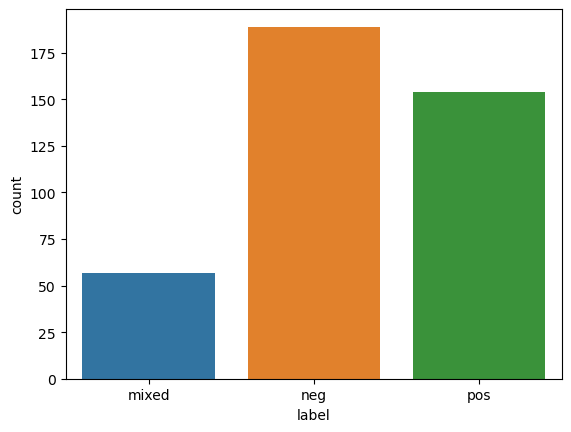

In [163]:
sns.countplot(x = 'label', data = review_df)

In [164]:
review_df['review']

0      \n6.7/10While "Nope" is a visual spectacle I f...
1      \nI've been dragging my feet on typing out my ...
2      \nIt starts off a little humorous, thought the...
3      \n"Nope" is the next disappointment by Jordan ...
4      \nThe way most critics are raving about "Nope"...
                             ...                        
395    \nThis was your usual Hollywood movie lately. ...
396    \nAgonizingly surrealistic, semi-psychodelic a...
397    \nWhat a gorgeous, exhilarating, heart breakin...
398    \nThis film is the first great biopic about El...
399    \nIt's a bit like Big Fish but without the sto...
Name: review, Length: 400, dtype: object

In [165]:
# We will be working with the first review in our dataset as an example to demonstrate linguistic visualizations
# review_df['review'].loc(0)[0]

In [166]:
review_doc = nlp(review_df['review'].loc(0)[0])

In [167]:
displacy.render(review_doc, style='dep', jupyter=True,options={'distance': 140})

In [168]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(review_doc):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

In [169]:
tokenized_text.head()

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,\n,"(\n,)",SPACE,_SP,dep,\n,False,False,False
1,6.7/10While,"(6.7/10while,)",NOUN,NN,nmod,d.d/ddXxxxx,False,False,False
2,"""","("",)",PUNCT,``,punct,"""",False,False,True
3,Nope,"(nope,)",INTJ,UH,nsubj,Xxxx,True,False,False
4,"""","("",)",PUNCT,'',punct,"""",False,False,True


In [170]:
displacy.render(review_doc, style='ent', jupyter=True,options={'distance': 140})

In [171]:
# Names of director, actors, the title of the film, and other such named entities may negatively affect our model's
# ability to accurately classify text. For example, if a movie is rated overwhelmingly negative, and the names of the
# cast, crew, and title are mentioned within the reviews, the named entities may be associated with the label, and the
# model will be unable to classify positive reviews of the film or featuring those cast/crew members. Therefore, we 
# will add such names to our list of stopwords

In [172]:
# our dataset is simply too big to be able to loop through and collect named entitites from every review, instead,
# we will repeat this process on a single review from every movie we have included
# in our dataset there are 16 unique movies, with 25 reviews from each. we will pull review 0, 25, 50, etc. to
# randomly sample some of the unwanted named entities

In [173]:
def find_ents(doc):
    entity_vec = {}
    if doc.ents:
        for ent in doc.ents:
            entity_vec.update({ent.text: ent.label_})
    return entity_vec

In [174]:
def stop_word_adder(ent_dict):
    for key, value in ent_dict.items():
        if value == 'PERSON' or value == 'WORK OF ART' or value == 'PRODUCT':
            nlp.Defaults.stop_words.add(key.lower())
            nlp.vocab[key.lower()].is_stop = True

In [175]:
# initialize dictionary of named entities
ent_dict = {}

In [176]:
# rerun this cell as many times as you would like to add more stopwords

import random
review_doc1 = nlp(review_df['review'].loc(0)[random.randint(0,24)])
review_doc2 = nlp(review_df['review'].loc(0)[random.randint(25,49)])
review_doc3 = nlp(review_df['review'].loc(0)[random.randint(50,74)])
review_doc4 = nlp(review_df['review'].loc(0)[random.randint(75,99)])
review_doc5 = nlp(review_df['review'].loc(0)[random.randint(100,124)])
review_doc6 = nlp(review_df['review'].loc(0)[random.randint(125,149)])
review_doc7 = nlp(review_df['review'].loc(0)[random.randint(150,174)])
review_doc8 = nlp(review_df['review'].loc(0)[random.randint(175,199)])
review_doc9 = nlp(review_df['review'].loc(0)[random.randint(200,224)])
review_doc10 = nlp(review_df['review'].loc(0)[random.randint(225,249)])
review_doc11 = nlp(review_df['review'].loc(0)[random.randint(250,274)])
review_doc12 = nlp(review_df['review'].loc(0)[random.randint(275,299)])
review_doc13 = nlp(review_df['review'].loc(0)[random.randint(300,324)])
review_doc14 = nlp(review_df['review'].loc(0)[random.randint(325,349)])
review_doc15 = nlp(review_df['review'].loc(0)[random.randint(350,374)])
review_doc16 = nlp(review_df['review'].loc(0)[random.randint(375,399)])

ent_dict.update(find_ents(review_doc1))
ent_dict.update(find_ents(review_doc2))
ent_dict.update(find_ents(review_doc3))
ent_dict.update(find_ents(review_doc4))
ent_dict.update(find_ents(review_doc5))
ent_dict.update(find_ents(review_doc6))
ent_dict.update(find_ents(review_doc7))
ent_dict.update(find_ents(review_doc8))
ent_dict.update(find_ents(review_doc9))
ent_dict.update(find_ents(review_doc10))
ent_dict.update(find_ents(review_doc11))
ent_dict.update(find_ents(review_doc12))
ent_dict.update(find_ents(review_doc13))
ent_dict.update(find_ents(review_doc14))
ent_dict.update(find_ents(review_doc15))
ent_dict.update(find_ents(review_doc16))

stop_word_adder(ent_dict)

In [177]:
print(ent_dict)

{'Oscar': 'PERSON', 'roughly $60': 'MONEY', 'Netflix': 'GPE', 'Prime Video': 'ORG', 'First': 'ORDINAL', 'spectacular night': 'TIME', 'Hoyte Van Hoytema': 'PERSON', "Christopher Nolan's": 'PERSON', 'Jordan Peele': 'PERSON', 'the first half': 'DATE', 'two': 'CARDINAL', 'African American': 'NORP', 'one': 'CARDINAL', 'Hollywood': 'GPE', 'CGI': 'ORG', "Fry's Electronics": 'ORG', 'Angel': 'PERSON', 'YouTube': 'ORG', 'TikTok': 'ORG', 'Michael Wincott': 'PERSON', 'Asian': 'NORP', 'Steven Yeun': 'PERSON', 'TMZ': 'ORG', 'Hoo': 'PERSON', 'Beckett': 'GPE', 'California': 'GPE', 'Jaws': 'WORK_OF_ART', 'Brody, Quint and Hooper': 'ORG', 'Oprah': 'PERSON', 'Peele': 'PERSON', "Daniel Kaluuya's": 'PERSON', 'Kiki Palmer': 'PERSON', 'third': 'ORDINAL', 'Us': 'GPE', 'Steven Spielberg': 'PERSON', 'M. Night Shyamalan': 'PERSON', 'Nope': 'ORG', "Jordan Peele's": 'PERSON', 'Helmsworth': 'PERSON', 'Thor': 'PERSON', 'Valkyrie': 'PERSON', 'Korg': 'PERSON', 'Natalie': 'PERSON', 'Thors': 'WORK_OF_ART', 'Zeus': 'PERS

In [178]:
# remove some default stopwords that may have relevance in determing a movie review's scoring (e.g, numbers)
# DO NOT RERUN (will return error)
unwanted_stop = ['everything', 'last', 'mostly', 'one', 'three', 'hundred', 'two', 'twelve', 'fifty', 'sixty', 'six',
                 'eight', 'fifteen', 'five', 'ten', 'four', 'eleven', 'twenty', 'forty', 'nine', 'nothing', 'serious',
                 'few', 'never', 'against', 'always']

def remove_stopwords(stop_list):
    for stopword in stop_list:
        nlp.Defaults.stop_words.remove(stopword)
        nlp.vocab[stopword].is_stop = False
remove_stopwords(unwanted_stop)

KeyError: 'everything'

In [179]:
# let's check if our stop words were updated
print(nlp.Defaults.stop_words)

{'kimura', 'everyone', 'keke palmer', 'chloe', 'dan trachtenberg', 'does', "'s", 'andrew koji', 'claire', 'barbasol', 'call', 'he', 'unless', '’d', 'why', 'done', 'only', 'once', "bruce wayne's", 'down', 'along', 'together', 'shailene woodley', 'behind', 'get', 'many', 'beside', 'anyhow', 'butler', 'hereafter', 'made', 'empty', 'guy ritchie', 'own', 'during', 'nowhere', 'maisie', 'between', 'anya taylor-joy', 'beyond', 'zeus', 'hereby', '"gorr -', 'hal needham', 'andrew', "daniel kaluuya's", 'us', 'on', 'back', 'be', 'those', 'over', "joaquin phoenix's", 'whenever', 'latter', 'ramsay', 'more', 'amount', 'before', 'peter parker', 'wahlberg', 'anywhere', 'which', 'm. night shyamalan', "christopher nolan's", 'jane thor', 'whole', 'as', 'thunder', 'jimmy page', 'please', 'when', 'yours', 'jordan', 'leitch', 'just', 'after', 'jeffrey wright', 'it', 'bryce', 're', 'an', 'douglas nolan bat-trilogy', "delia owen's", 'n‘t', 'enjoyed lost world', 'nor', 'without', 'korg', 'name', 'chris pratt', 

In [180]:
# for our first algorithm, we will try creating a basic sentiment analysis model using NLTK

In [181]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\filto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [182]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [183]:
def score_determiner(c):
    if c <= -0.3:
        return 'neg'
    elif c > -0.3 and c <= 0.3:
        return 'mixed'
    else:
        return 'pos'

In [184]:
review_df['scores'] = review_df['review'].apply(lambda review: sid.polarity_scores(review))
review_df['positive'] = review_df['scores'].apply(lambda score_dict: score_dict['pos'])
review_df['negative'] = review_df['scores'].apply(lambda score_dict: score_dict['neg'])
review_df['neutral'] = review_df['scores'].apply(lambda score_dict: score_dict['neu'])
review_df['compound'] = review_df['scores'].apply(lambda score_dict: score_dict['compound'])
review_df['comp_score'] = review_df['compound'].apply(score_determiner)
review_df.drop('scores', axis = 1, inplace = True)
review_df.head(20)

,label,review,positive,negative,neutral,compound,comp_score
0,mixed,"\n6.7/10While ""Nope"" is a visual spectacle I f...",0.124,0.108,0.768,0.8006,pos
1,mixed,\nI've been dragging my feet on typing out my ...,0.081,0.050,0.870,0.9062,pos
2,mixed,"\nIt starts off a little humorous, thought the...",0.173,0.102,0.725,0.9885,pos
3,neg,"\n""Nope"" is the next disappointment by Jordan ...",0.124,0.091,0.785,0.9601,pos
4,neg,"\nThe way most critics are raving about ""Nope""...",0.107,0.070,0.823,0.9946,pos
5,pos,"\nOriginal, creative, creepy and suspenseful. ...",0.086,0.058,0.856,0.9588,pos
6,neg,\nThis may be the most apropos title for a mov...,0.058,0.020,0.922,0.5149,pos
7,neg,\nI'm not really sure what I just saw. This ha...,0.086,0.069,0.845,0.5301,pos
8,neg,\nI hope we are not about to see the Shyamalan...,0.212,0.051,0.737,0.9876,pos
9,neg,"\nSaw ""Nope"" and if I had to grade for individ...",0.111,0.116,0.774,-0.8915,neg


<AxesSubplot:xlabel='label', ylabel='count'>

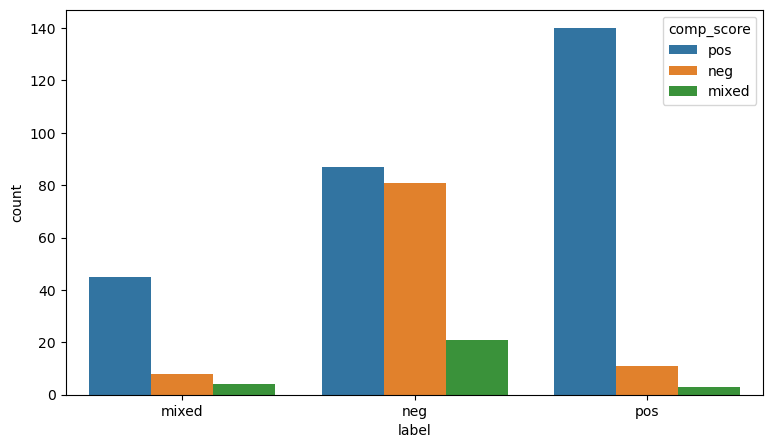

In [185]:
plt.figure(figsize=(9,5))
sns.countplot(x = 'label', data=review_df, hue = 'comp_score')

In [186]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [187]:
accuracy_score(review_df['label'], review_df['comp_score'])

0.5625

In [188]:
print(classification_report(review_df['label'], review_df['comp_score']))

              precision    recall  f1-score   support

       mixed       0.14      0.07      0.09        57
         neg       0.81      0.43      0.56       189
         pos       0.51      0.91      0.66       154

    accuracy                           0.56       400
   macro avg       0.49      0.47      0.44       400
weighted avg       0.60      0.56      0.53       400



In [189]:
# positive reviews overwhelmingly classified correctly, however the sentiment analysis algorithm has difficulty
# interpreting mixed to negative reviews.
# we need another algorithm that can account for this...

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 

In [191]:
review_df.head()

,label,review,positive,negative,neutral,compound,comp_score
0,mixed,"\n6.7/10While ""Nope"" is a visual spectacle I f...",0.124,0.108,0.768,0.8006,pos
1,mixed,\nI've been dragging my feet on typing out my ...,0.081,0.050,0.870,0.9062,pos
2,mixed,"\nIt starts off a little humorous, thought the...",0.173,0.102,0.725,0.9885,pos
3,neg,"\n""Nope"" is the next disappointment by Jordan ...",0.124,0.091,0.785,0.9601,pos
4,neg,"\nThe way most critics are raving about ""Nope""...",0.107,0.070,0.823,0.9946,pos


In [192]:
X = review_df['review']
y = review_df['label']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [194]:
review_nb = Pipeline([('tfidf', TfidfVectorizer()),
                       ('MultinomialNB', MultinomialNB())])

In [195]:
review_nb.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [196]:
predictions = review_nb.predict(X_test)

In [197]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       mixed       0.00      0.00      0.00        21
         neg       0.51      0.98      0.67        54
         pos       0.88      0.31      0.46        45

    accuracy                           0.56       120
   macro avg       0.46      0.43      0.38       120
weighted avg       0.56      0.56      0.47       120



C:\Users\filto\anaconda3\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filto\anaconda3\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\filto\anaconda3\envs\venv2\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
print(confusion_matrix(y_test, predictions))

[[ 0 20  1]
 [ 0 53  1]
 [ 0 31 14]]


In [199]:
# our model appears to be wildly underestimating the number of positive and mixed reviews
# Therefore, we will use the RandomOverSampler algorithm which balances textual data

In [200]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [201]:
Counter(y_train)

Counter({'pos': 109, 'neg': 135, 'mixed': 36})

In [202]:
vectorizer = TfidfVectorizer()

In [203]:
X_tfidf = vectorizer.fit_transform(X)

In [204]:
print(X_tfidf)

  (0, 7121)	0.05501434824903543
  (0, 2712)	0.05709645509991508
  (0, 8114)	0.033156609014378474
  (0, 5373)	0.057663522660510766
  (0, 8498)	0.05709645509991508
  (0, 6639)	0.057663522660510766
  (0, 5281)	0.03291854882722446
  (0, 6362)	0.07315093936894165
  (0, 8966)	0.028521673204285412
  (0, 7987)	0.06905998800734069
  (0, 2893)	0.06314274318827928
  (0, 5717)	0.09824632433933017
  (0, 8763)	0.08111605910553248
  (0, 4635)	0.07479378789430846
  (0, 7409)	0.0703080650829588
  (0, 1476)	0.051929722773542984
  (0, 5384)	0.06682866815771764
  (0, 1407)	0.0766303362941828
  (0, 6951)	0.03493330075964112
  (0, 8677)	0.06682866815771764
  (0, 729)	0.04685552863793708
  (0, 3483)	0.04445191267746706
  (0, 1851)	0.037404271638574134
  (0, 3997)	0.03113458948016242
  (0, 2085)	0.06314274318827928
  :	:
  (399, 4791)	0.29628731316549556
  (399, 5505)	0.12927801719752305
  (399, 5396)	0.10448720729370371
  (399, 919)	0.14993680075754143
  (399, 3648)	0.10832133701295203
  (399, 8734)	0.111614

In [205]:
# in order to prevent an error where our vectorized training and testing data have different numbers of unique words /
# vectors, we will convert our vectorized X, y data to an array BEFORE our train_test_split
X_tfidf_array = X_tfidf.toarray()

In [206]:
X_train_array, X_test_array, y_train, y_test = train_test_split(X_tfidf_array, y, test_size = 0.3, random_state = 101)

In [207]:
naive_bayes2 = MultinomialNB()

In [208]:
ROS = RandomOverSampler(random_state = 101)

In [209]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_array, y_train)

In [210]:
naive_bayes2.fit(X_train_ros, y_train_ros)

MultinomialNB()

In [211]:
predictions1 = naive_bayes2.predict(X_test_array)

In [212]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

       mixed       0.26      0.81      0.40        21
         neg       0.88      0.43      0.57        54
         pos       0.86      0.56      0.68        45

    accuracy                           0.54       120
   macro avg       0.67      0.60      0.55       120
weighted avg       0.77      0.54      0.58       120



In [213]:
# now let's try to use the stopwords list we created to see if it improves performance
vectorizer2 = TfidfVectorizer(stop_words = 'english')

In [214]:
X_tfidf2 = vectorizer2.fit_transform(X)

In [215]:
X_tfidf_array2 = X_tfidf2.toarray()

In [216]:
X_train_array2, X_test_array2, y_train, y_test = train_test_split(X_tfidf_array2, y, test_size = 0.3, random_state = 101)

In [217]:
X_train_ros2, y_train_ros = ROS.fit_resample(X_train_array2, y_train)

In [218]:
naive_bayes2.fit(X_train_ros2, y_train_ros)

MultinomialNB()

In [219]:
predictions2 = naive_bayes2.predict(X_test_array2)

In [220]:
# looks like adding stopwords makes our predictions worse (most likely due to this being multiclass
# as opposed to binary classification), so we will not use them from here on

print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

       mixed       0.27      0.67      0.39        21
         neg       0.82      0.52      0.64        54
         pos       0.74      0.58      0.65        45

    accuracy                           0.57       120
   macro avg       0.61      0.59      0.56       120
weighted avg       0.70      0.57      0.60       120



In [221]:
# let's optimize the best number of mixed reviews to balance our training data

error_rate = []
for i in range(110,135):
        strategy = {'pos': 135, 'neg': 135, 'mixed': i}
        ROS = RandomOverSampler(sampling_strategy = strategy, random_state = 101)
        X_train_ros, y_train_ros = ROS.fit_resample(X_train_array, y_train)
        naive_bayes2.fit(X_train_ros, y_train_ros)
        pred_i = naive_bayes2.predict(X_test_array)
        error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

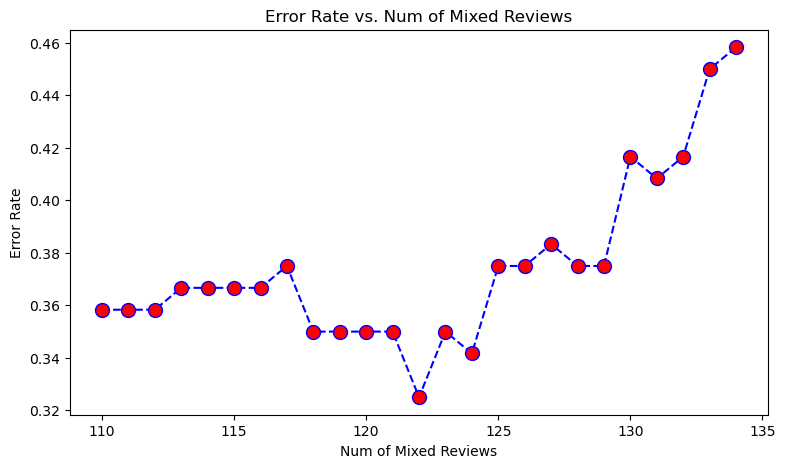

In [222]:
# it appears as though error is minimized when the number of mixed reviews in our training set is 122

plt.figure(figsize=(9,5))
plt.plot(range(110,135),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Num of Mixed Reviews')
plt.xlabel('Num of Mixed Reviews')
plt.ylabel('Error Rate')

In [223]:
# the number of each label type we want to include in our training data.
# we will set the number of each label type to be the number of the maximum label in our training set (negative)
# in our attempt, the best number of mixed reviews is 122
strategy = {'pos': 135, 'neg': 135, 'mixed': 122}

In [224]:
ROS = RandomOverSampler(sampling_strategy = strategy, random_state = 101)

In [225]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_array, y_train)

In [226]:
naive_bayes2.fit(X_train_ros, y_train_ros)

MultinomialNB()

In [227]:
predictions2 = naive_bayes2.predict(X_test_array)

In [228]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

       mixed       0.46      0.52      0.49        21
         neg       0.87      0.61      0.72        54
         pos       0.64      0.82      0.72        45

    accuracy                           0.68       120
   macro avg       0.65      0.65      0.64       120
weighted avg       0.71      0.68      0.68       120



In [229]:
# let's try to optimize both the number of mixed and positive reviews for our sample (the minority classes)
# This nested loop iterates over 625 values so it may take some time!

error_rate = []
for i in range(110,135):
    for j in range(110,135):
        strategy = {'pos': i, 'neg': 135, 'mixed': j}
        ROS = RandomOverSampler(sampling_strategy = strategy, random_state = 101)
        X_train_ros, y_train_ros = ROS.fit_resample(X_train_array, y_train)
        naive_bayes2.fit(X_train_ros, y_train_ros)
        pred_i = naive_bayes2.predict(X_test_array)
        error_rate.append(np.mean(pred_i != y_test))
        
print(len(error_rate))

625


In [230]:
#To create 3d plotting we need to fit our error rate points to corresponding index of i and j
range_X = []
for i in range(110,135):
    range_X = range_X + ([i]*25)
    
print(range_X)
#Because our nest fixes i first, the first 25 values of range_X corresponds to i=110, same for the next 25 values...          

[110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117,

In [231]:
# Because our nest has j varies from 110 to 134 through ten cycles, the first 25 values of range_Y corresponds to range(110,135)
# same for the next 25 values...   

range_Y = []
for j in range(110,135):
    range_Y.append(j)
range_Y = range_Y *25

print(range_Y)

[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,

In [232]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

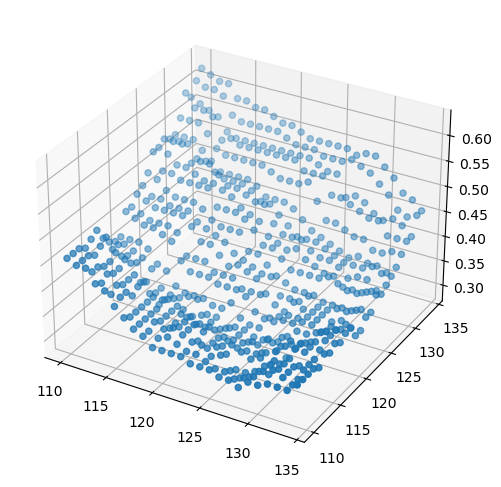

In [233]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(range_X, range_Y, error_rate)

In [234]:
# this 3D scatterplot is sufficient for our purposes, but for the sake of aesthetics, let's interpolate it
# into a surface plot

In [235]:
i = 0
range_X2 = []

for i in range(110,135):
    range_X2.append([i]*25)
print(range_X2)

[[110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110], [111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111, 111], [112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112], [113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113, 113], [114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114, 114], [115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115], [116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116], [117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117,

In [236]:
i = 0
range_Y2 = []
for i in range(1,26):
    range_Y2.append(range_Y[0:25])
    i += 1
print(range_Y2)

[[110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134], [110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,

In [237]:
print(error_rate)

[0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.45, 0.4583333333333333, 0.4666666666666667, 0.44166666666666665, 0.425, 0.4166666666666667, 0.4166666666666667, 0.4583333333333333, 0.4583333333333333, 0.475, 0.48333333333333334, 0.5, 0.5333333333333333, 0.5333333333333333, 0.5416666666666666, 0.5333333333333333, 0.5333333333333333, 0.5583333333333333, 0.6, 0.5833333333333334, 0.6083333333333333, 0.625, 0.45, 0.45, 0.45, 0.44166666666666665, 0.45, 0.4583333333333333, 0.425, 0.425, 0.4166666666666667, 0.4166666666666667, 0.45, 0.45, 0.4666666666666667, 0.4666666666666667, 0.49166666666666664, 0.5, 0.525, 0.5416666666666666, 0.5333333333333333, 0.5333333333333333, 0.5583333333333333, 0.575, 0.575, 0.6, 0.6166666666666667, 0.45, 0.43333333333333335, 0.43333333333333335, 0.425, 0.425, 0.43333333333333335, 0.4166666666666667, 0.4083333333333333, 0.4083333333333333, 0.4166666666666667, 0.44166666666666665, 0.44166666666666665, 0.4583333333333333, 0.4666666666666667, 0.475, 0.5, 

In [238]:
error_rate3 = []
error_rate4 = []
for index, list_entry in enumerate(error_rate):
    if (index % 25) != 0 or index == 0:
        error_rate3.append(list_entry)
    else:
        error_rate4.append(error_rate3)
        error_rate3 = []
        error_rate3.append(list_entry)
        
error_rate4.append(error_rate3)

In [239]:
len(range_Y2)

25

In [240]:
print(error_rate4)

[[0.4583333333333333, 0.4583333333333333, 0.4583333333333333, 0.45, 0.4583333333333333, 0.4666666666666667, 0.44166666666666665, 0.425, 0.4166666666666667, 0.4166666666666667, 0.4583333333333333, 0.4583333333333333, 0.475, 0.48333333333333334, 0.5, 0.5333333333333333, 0.5333333333333333, 0.5416666666666666, 0.5333333333333333, 0.5333333333333333, 0.5583333333333333, 0.6, 0.5833333333333334, 0.6083333333333333, 0.625], [0.45, 0.45, 0.45, 0.44166666666666665, 0.45, 0.4583333333333333, 0.425, 0.425, 0.4166666666666667, 0.4166666666666667, 0.45, 0.45, 0.4666666666666667, 0.4666666666666667, 0.49166666666666664, 0.5, 0.525, 0.5416666666666666, 0.5333333333333333, 0.5333333333333333, 0.5583333333333333, 0.575, 0.575, 0.6, 0.6166666666666667], [0.45, 0.43333333333333335, 0.43333333333333335, 0.425, 0.425, 0.43333333333333335, 0.4166666666666667, 0.4083333333333333, 0.4083333333333333, 0.4166666666666667, 0.44166666666666665, 0.44166666666666665, 0.4583333333333333, 0.4666666666666667, 0.475, 

In [241]:
range_X2 = np.asarray(range_X2)
range_Y2 = np.asarray(range_Y2)
error_rate4 = np.asarray(error_rate4)

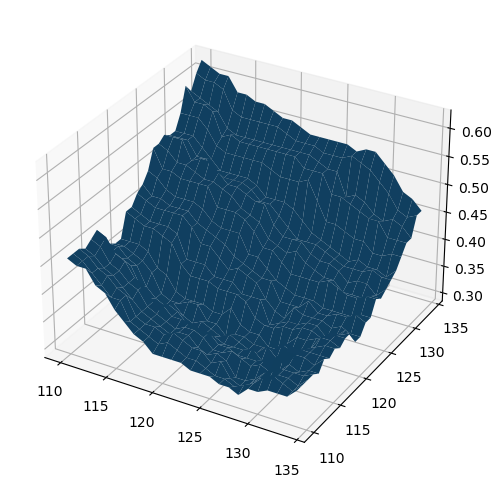

In [242]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(range_X2, range_Y2, error_rate4)

In [243]:
# Now we know the index of the minimum error rate
x = min(error_rate)
index = error_rate.index(x)

In [244]:
print(range_X[index])
#The i-value (number of positive comments) corresponding to minimun error rate is 128

128


In [245]:
print(range_Y[index])
#The i=j-value (number of mixed comments) corresponding to minimun error rate is 116

116


In [246]:
# Thus, the sampling strategy should be, increasing the number of positive comments to 128,
# and increasing the number of mixed comments to 116

In [247]:
strategy = {'pos': 128, 'mixed': 116, 'neg': 135}

In [248]:
ROS = RandomOverSampler(sampling_strategy = strategy, random_state = 101)

In [249]:
X_train_ros, y_train_ros = ROS.fit_resample(X_train_array, y_train)

In [250]:
naive_bayes2.fit(X_train_ros, y_train_ros)

MultinomialNB()

In [251]:
predictions3 = naive_bayes2.predict(X_test_array)

In [252]:
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

       mixed       0.50      0.38      0.43        21
         neg       0.79      0.76      0.77        54
         pos       0.69      0.80      0.74        45

    accuracy                           0.71       120
   macro avg       0.66      0.65      0.65       120
weighted avg       0.70      0.71      0.70       120



In [253]:
# it appears that our mixed recall went down as optimizing for mixed reviews possibly led to some positive
# and negative being classed as mixed. On the other hand, our negative recall went up significantly, as less 
# mixed and positive reviews were wrongly classified as negative

In [254]:
# let's deploy gradient descent to see if we can get a better estimate for our predictions column

In [255]:
# let's construct a cost function in the form Y = B + theta_n * X_n, where B is our bias and theta is a vector of
# weights on each unique word in our array of vectorized reviews

In [256]:
import random

def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b, theta

b, theta = initialize(X_tfidf_array.shape[1])
print('Bias: {}, Weights: {}'.format(b, theta))

Bias: 0.2961118048593766, Weights: [0.77133531 0.20100286 0.09195733 ... 0.30857372 0.36809402 0.73209886]


In [257]:
def predict_Y(b, theta, X):
    return b + np.dot(X,theta)

Y_hat = predict_Y(b,theta, X_tfidf_array)
print(Y_hat[0:10])

[5.15975906 6.89313236 6.48597159 6.71795329 9.08775349 7.92626101
 3.87889867 3.86191374 5.35617763 5.9339251 ]


In [258]:
# we need to transform our labels column into numbers so that we can find the difference between the actual
# "value" of the labels and our predicted value

def numerize(label):
    if label == 'neg':
        return -1
    elif label == 'mixed':
        return 0
    else:
        return 1
    
Y = review_df['label'].apply(numerize)
print(Y)

0      0
1      0
2      0
3     -1
4     -1
      ..
395   -1
396   -1
397    1
398    1
399   -1
Name: label, Length: 400, dtype: int64


In [259]:
import math

def get_cost(Y, Y_hat):
    Y_resd = Y - Y_hat
    return np.sum(np.dot(Y_resd.T, Y_resd)) / len(Y - Y_resd)

Y_hat = predict_Y(b, theta, X_tfidf_array)
print(get_cost(Y, Y_hat))

27.398084422072913


In [260]:
def update_theta(x, y, y_hat, b_0, theta_0, learning_rate):
    deriv_b = (np.sum(y_hat - y) * 2) / len(y)
    deriv_theta = (np.dot((y_hat-y), x) * 2) / len(y)
    b_1 = b_0 - learning_rate * deriv_b
    theta_1 = theta_0 - learning_rate * deriv_theta
    return b_1, theta_1

print("After initialization -Bias: ", b, "theta: ", theta)
Y_hat = predict_Y(b, theta, X_tfidf_array)
b,theta = update_theta(X_tfidf_array, Y, Y_hat, b, theta, 0.01)
print("After first update -Bias: ", b, "theta: ", theta)
get_cost(Y, Y_hat)

After initialization -Bias:  0.2961118048593766 theta:  [0.77133531 0.20100286 0.09195733 ... 0.30857372 0.36809402 0.73209886]
After first update -Bias:  0.19798247496759291 theta:  [0.77130336 0.20087927 0.09124654 ... 0.30854011 0.3680736  0.73200894]


27.398084422072913

In [261]:
# let's run gradient descent on our training data to find optimal bias and weights, then apply those values to the
# test array to see if we can predict values for our review label array that can be converted back to text with 
# (hopefully) some degree of accuracy

In [262]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0
    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b = b
        prev_theta = theta
        b,theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)
        if (iter_num % 10 == 0):
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx += 1
            iter_num += 10
    print("Final Estimate of b: {}\nFinal Estimate of theta: {}".format(b, theta))
    return gd_iterations_df, b, theta

gd_iterations_df, b, theta = run_gradient_descent(X_train_array, y_train.apply(numerize), alpha = 0.01, num_iterations = 100)
print(gd_iterations_df)

Final Estimate of b: -3.5533879197855573
Final Estimate of theta: [0.41816014 0.06055547 0.30839162 ... 0.95080519 0.23816428 0.8149231 ]
    iteration       cost
0         0.0  30.561167
1        10.0  29.301841
2        20.0  28.099563
3        30.0  26.951744
4        40.0  25.855918
..        ...        ...
95      950.0   3.043504
96      960.0   3.027095
97      970.0   3.011382
98      980.0   2.996332
99      990.0   2.981917

[100 rows x 2 columns]


In [263]:
from sklearn import preprocessing

In [264]:
# normalize our results between -1 and +1 while preserving the information about the distance between each point
# (to match our "numerize" function)

Y_hat = predict_Y(b, theta, X_test_array)
Y_hat = Y_hat.reshape(-1,1)
transformer2 = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(Y_hat)
Y_hat_norm = transformer2.transform(Y_hat)
print(Y_hat_norm[0:10])

[[ 0.26557721]
 [ 0.07298762]
 [-0.31932241]
 [-0.59898387]
 [ 0.38579744]
 [-0.55695198]
 [-0.56775108]
 [-0.43811904]
 [-0.0154157 ]
 [ 0.15434458]]


In [265]:
def denumerize(array):
    if array < -0.25:
        return 'neg'
    elif array < 0.25:
        return 'mixed'
    else:
        return 'pos'

Y_hat_norm = Y_hat_norm.reshape(Y_hat_norm.size)
Y_hat_series = pd.Series(Y_hat_norm)
predictions4 = Y_hat_series.apply(denumerize)
print(predictions4)

0        pos
1      mixed
2        neg
3        neg
4        pos
       ...  
115      neg
116      neg
117      neg
118      neg
119      neg
Length: 120, dtype: object


In [ ]:
# NOTE: may perform differently on subsequential iterations of the code, as of 9/4/2022 performance metrics were:

#              precision     recall     f1-score     support
# mixed        0.24          0.38       0.30         21
# neg          0.46          0.57       0.51         54
# positive     0.35          0.16       0.22         45

# accuracy                              0.38         120
# macro avg    0.35          0.37       0.34         120
# weighted avg 0.38          0.38       0.36         120

In [267]:
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

       mixed       0.24      0.38      0.30        21
         neg       0.46      0.57      0.51        54
         pos       0.35      0.16      0.22        45

    accuracy                           0.38       120
   macro avg       0.35      0.37      0.34       120
weighted avg       0.38      0.38      0.36       120



In [269]:
# our gradient descent model performed poorly. this is probably because the algorithm was designed for use
# on linear regression tasks involving numeric data, and the processs of converting our labels column to
# numeric, finding the error function, normalizing the data, and converting back to categorical likely lost
# a considerable deal of accuracy

In [270]:
# this leaves Multinomial Naive Bayes as our best-performing model after balancing the data with Random Over Sampler
# and optimizing for the best number of positive / mixed reviews. Thank you for looking at our code!